In [1]:
from mri.models import Scan
from mutual_information.models import MutualInformationScore
from research.models import Subject

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = MutualInformationScore.objects.generate_df()

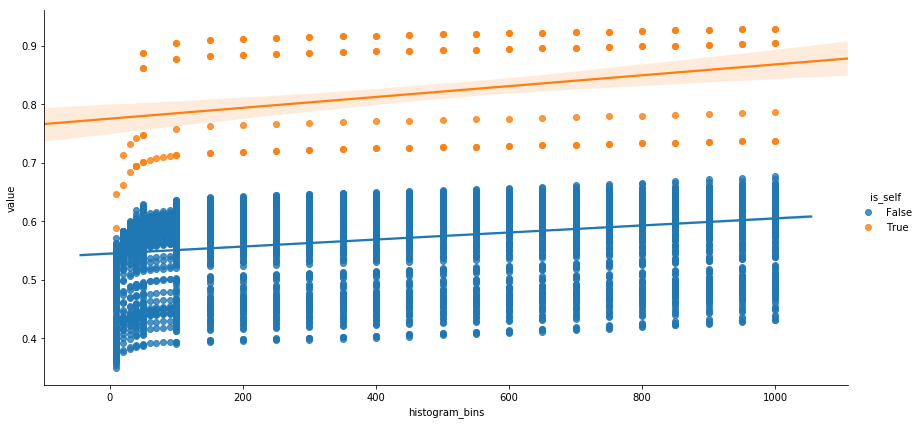

In [4]:
# fig, ax = plt.subplots(figsize=(20, 10))
lm = sns.lmplot(x='histogram_bins', y='value', hue='is_self', data=df, height=6, aspect=2)